In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("C:/Users/Rahul Kumawat/Desktop/Data Analysis/Black Friday/train_oSwQCTC/train.csv")
test = pd.read_csv("C:/Users/Rahul Kumawat/Desktop/Data Analysis/Black Friday/test_HujdGe7/test.csv")
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
train.isna().sum() 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

## Data Cleaning

In [10]:
total = train.isna().sum()
percent = train.isna().sum()/train.isna().count()
pd.concat([total, percent], axis =  1, keys= ['Total', 'Percent'])

,Total,Percent
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,0.315666


In [11]:
mode1 = train['Product_Category_2'].mode()
mode2 = train['Product_Category_3'].mode()
print(mode1, mode2)

0    8.0
dtype: float64 0    16.0
dtype: float64


In [12]:
train['Product_Category_2'].fillna(8.0, inplace = True)
train['Product_Category_3'].fillna(16.0, inplace = True)

In [13]:
train['Stay_In_Current_City_Years'].replace({'4+' : '4'}, inplace = True)

## Exploratory Data Analysis

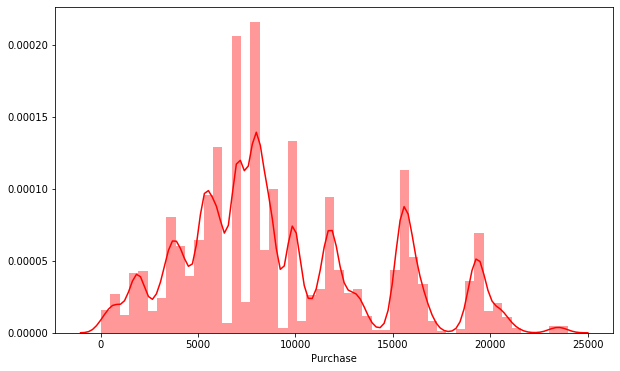

In [14]:
plt.figure(figsize = (10,6))
sns.distplot( train['Purchase'], color = 'red')

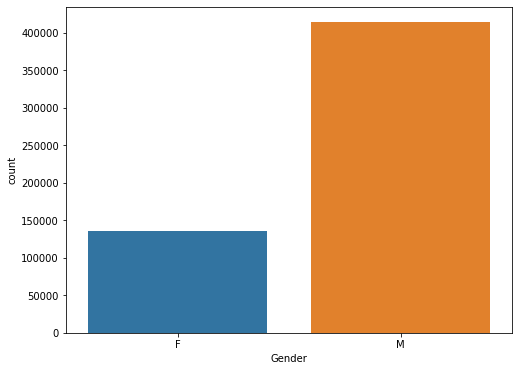

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(train['Gender'])

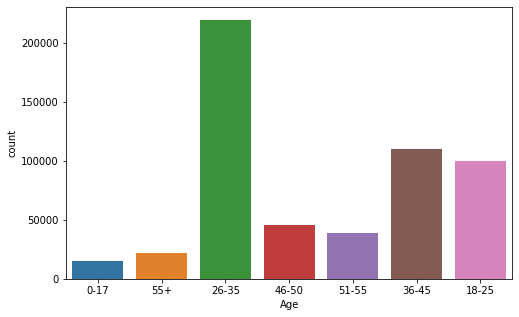

In [16]:
plt.figure(figsize = (8,5))
sns.countplot(train['Age'])

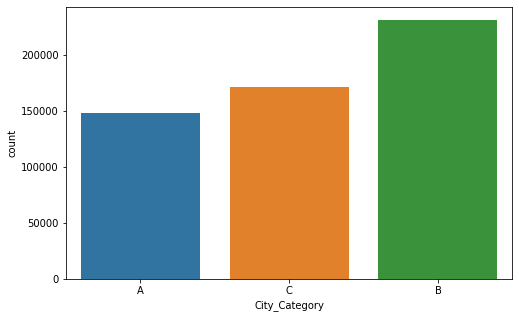

In [17]:
plt.figure(figsize = (8,5))
sns.countplot(train['City_Category'])

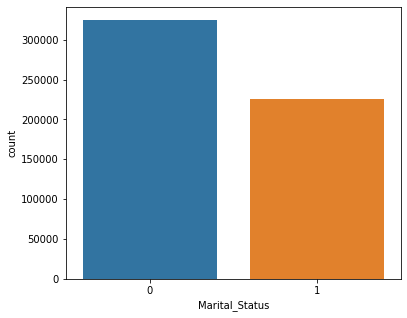

In [18]:
plt.figure(figsize = (6,5))
sns.countplot(train['Marital_Status'])

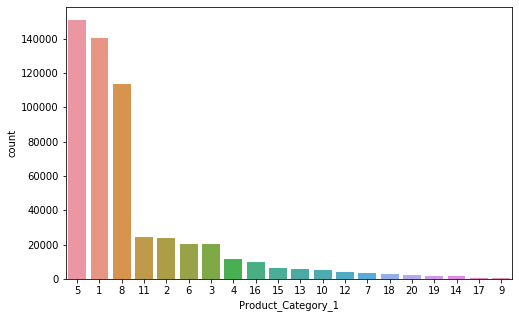

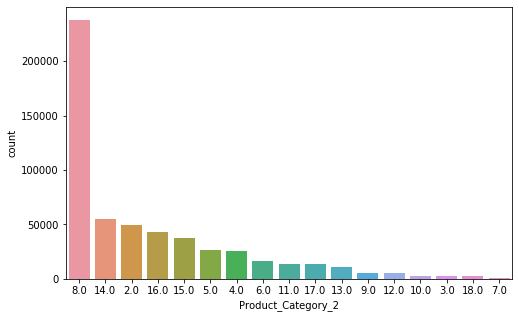

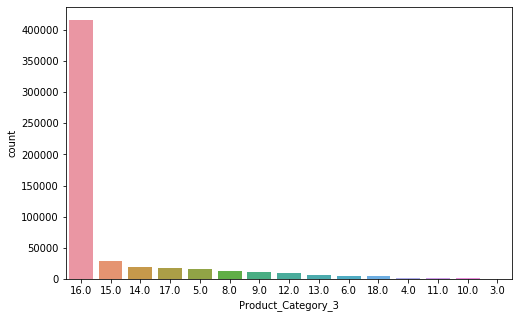

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(train['Product_Category_1'], order = train['Product_Category_1'].value_counts().index)
plt.figure(figsize = (8,5))
sns.countplot(train['Product_Category_2'], order = train['Product_Category_2'].value_counts().index)
plt.figure(figsize = (8,5))
sns.countplot(train['Product_Category_3'], order = train['Product_Category_3'].value_counts().index)

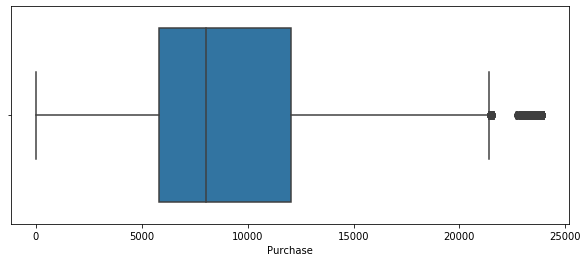

In [20]:
plt.figure(figsize = (10,4))
sns.boxplot(train['Purchase'])

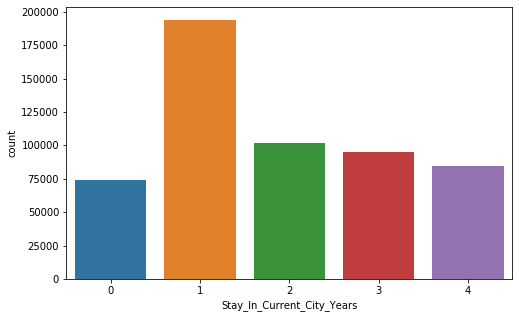

In [21]:
plt.figure(figsize = (8,5))
sns.countplot(train['Stay_In_Current_City_Years'])

In [22]:
corr_matrix = train.corr()
corr_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.002065,-0.000186,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.001566,0.000246,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.002065,0.001566,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.000186,0.000246,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


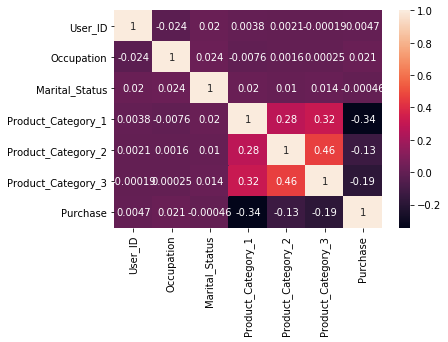

In [23]:
sns.heatmap(corr_matrix, annot = True)

In [24]:
data = train.groupby('Age')['Purchase'].mean()
data

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Age group vs average amount spent')

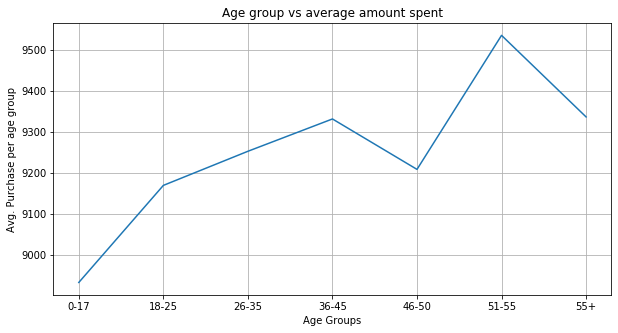

In [25]:
plt.figure(figsize = (10,5))
plt.plot(data)
plt.grid()
plt.xlabel('Age Groups')
plt.ylabel('Avg. Purchase per age group')
plt.title('Age group vs average amount spent')

In [26]:
train.groupby('Age')['Gender']

In [27]:
Age_data = train['Age'].value_counts()
Gender_data = train['Gender'].value_counts()
City_data = train['City_Category'].value_counts()

Text(0.5, 1.0, 'City split')

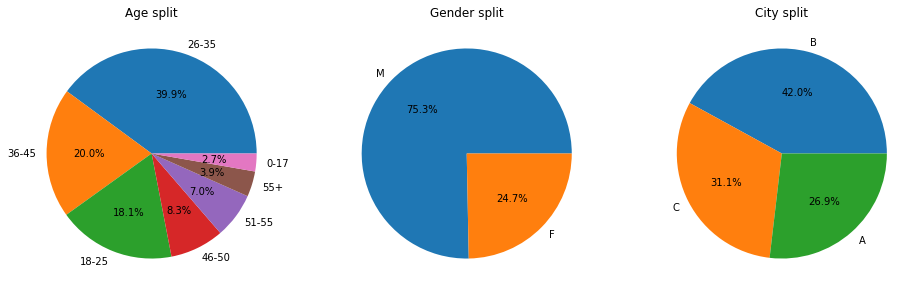

In [28]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1)
plt.pie(Age_data, autopct = '%1.1f%%', labels= Age_data.index)
plt.title('Age split')
plt.subplot(1,3,2)
plt.pie(Gender_data, autopct = '%1.1f%%', labels= Gender_data.index)
plt.title('Gender split')
plt.subplot(1,3,3)
plt.pie(City_data, autopct = '%1.1f%%', labels= City_data.index)
plt.title('City split')

In [29]:
Split_data = [Age_data, Gender_data, City_data]
type(Split_data)

list

In [30]:
train.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [31]:
Occupation_data = train.groupby('Occupation')['Purchase'].mean()
Occupation_data

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Occupation category vs average amount spent')

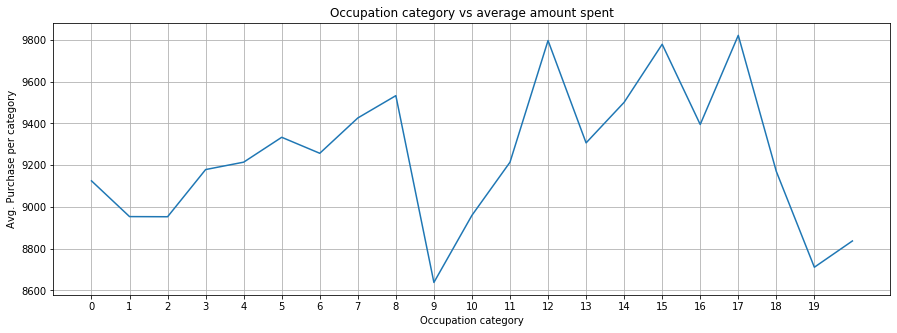

In [32]:
plt.figure(figsize = (15,5))
plt.plot(Occupation_data)
plt.grid()
plt.xticks(np.arange(0,20,1))
plt.xlabel('Occupation category')
plt.ylabel('Avg. Purchase per category')
plt.title('Occupation category vs average amount spent')

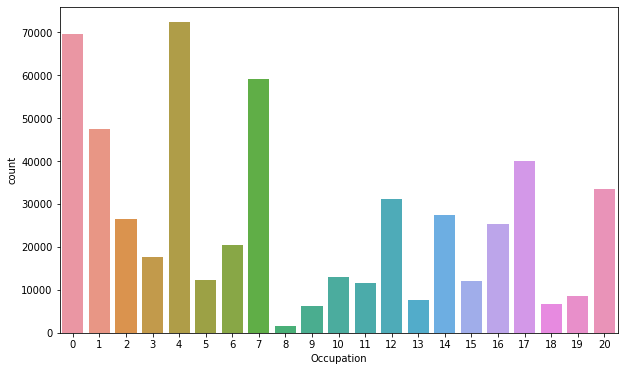

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(train['Occupation'], )

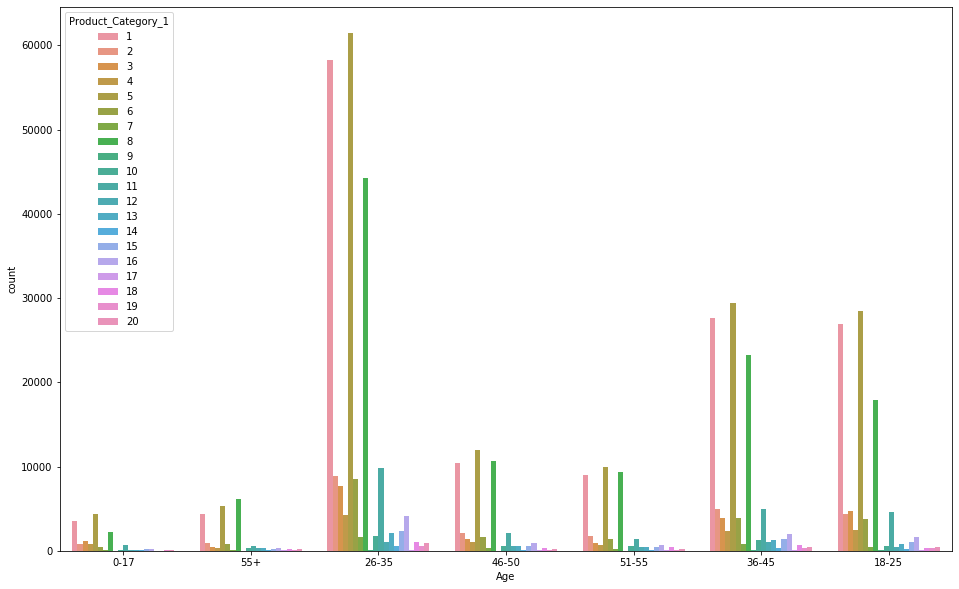

In [34]:
plt.figure(figsize = (16,10))
sns.countplot(train['Age'], hue = train['Product_Category_1'])

In [35]:
(train.groupby('Age')['Purchase'].sum()/train['Purchase'].sum())*100

Age
0-17      2.647530
18-25    17.933325
26-35    39.871374
36-45    20.145361
46-50     8.258612
51-55     7.203947
55+       3.939850
Name: Purchase, dtype: float64

## Purchase Amount Prediction

In [36]:
train.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [37]:
train = pd.get_dummies(train, columns = ['City_Category', 'Age', 'Gender'], drop_first = True)
train.dtypes

Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
City_Category_B                 uint8
City_Category_C                 uint8
Age_18-25                       uint8
Age_26-35                       uint8
Age_36-45                       uint8
Age_46-50                       uint8
Age_51-55                       uint8
Age_55+                         uint8
Gender_M                        uint8
dtype: object

In [38]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('int64')
train['Product_Category_2'] = train['Product_Category_2'].astype('int64')
train['Product_Category_3'] = train['Product_Category_3'].astype('int64')

In [39]:
y = train['Purchase']
x = train.drop(['Purchase'], axis = 1)
print(x.shape, y.shape)

(550068, 15) (550068,)


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100 )

In [41]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [42]:
def fit_model(model):
    if model == DecisionTreeRegressor:
        reg = model(random_state = 100)
    else:
        reg = model()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    rmse = sqrt(mse)
    print('RMSE :' ,rmse)
    print('R2_sq :',r_squared)    

In [43]:
fit_model(DummyRegressor)

RMSE : 5024.000278111723
R2_sq : -4.675606742243765e-05


In [44]:
fit_model(LinearRegression)

RMSE : 4680.220165972439
R2_sq : 0.13213222458973928


In [45]:
fit_model(DecisionTreeRegressor)

RMSE : 3292.372136333462
R2_sq : 0.5705240678199779


In [46]:
fit_model(XGBRegressor)

RMSE : 2890.2734951014936
R2_sq : 0.669022191219169


In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGBRegressor(), X = x_train, y= y_train, cv=10)
accuracies

array([0.66931187, 0.67193163, 0.67118087, 0.67778156, 0.66906608,
       0.67139293, 0.67013385, 0.67223418, 0.67180586, 0.66920832])

In [49]:
accuracies.mean()

0.6714047150104779